In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
np.random.seed(80013493)
tf.set_random_seed(80013493)

mnist불러옴

In [3]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
#히든레이어를 5개 둠으로써 deep nn구성
#노드개수를 512개로 설정
num_units = 512

# input place holders
x = tf.placeholder(tf.float32, [None, 784])
t = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
W1 = tf.get_variable("W1", shape=[784, num_units],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([num_units]))
L1 = tf.nn.relu(tf.matmul(x, W1) + b1)

W2 = tf.get_variable("W2", shape=[num_units, num_units],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([num_units]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[num_units, num_units],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([num_units]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

W4 = tf.get_variable("W4", shape=[num_units, num_units],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([num_units]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

W5 = tf.get_variable("W5", shape=[num_units, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
p = tf.matmul(L4, W5) + b5


In [0]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=p, labels=t))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

i = 0
for _ in range(10000):
  i += 1
  batch_xs, batch_ts = mnist.train.next_batch(100)
  sess.run(optimizer, feed_dict = {x:batch_xs, t:batch_ts})
  if i%1000 == 0:
    loss_val, acc_val = sess.run([cost, accuracy], feed_dict = {x:mnist.test.images, t:mnist.test.labels})
    print('Step: %d, Loss: %f, Accuracy: %f' %(i, loss_val, acc_val))


Step: 1000, Loss: 0.106218, Accuracy: 0.969000
Step: 2000, Loss: 0.082440, Accuracy: 0.975300
Step: 3000, Loss: 0.078025, Accuracy: 0.979300
Step: 4000, Loss: 0.074523, Accuracy: 0.981600
Step: 5000, Loss: 0.077907, Accuracy: 0.981400
Step: 6000, Loss: 0.098520, Accuracy: 0.976500
Step: 7000, Loss: 0.074303, Accuracy: 0.982400
Step: 8000, Loss: 0.109113, Accuracy: 0.978700
Step: 9000, Loss: 0.105982, Accuracy: 0.980800
Step: 10000, Loss: 0.109690, Accuracy: 0.983300


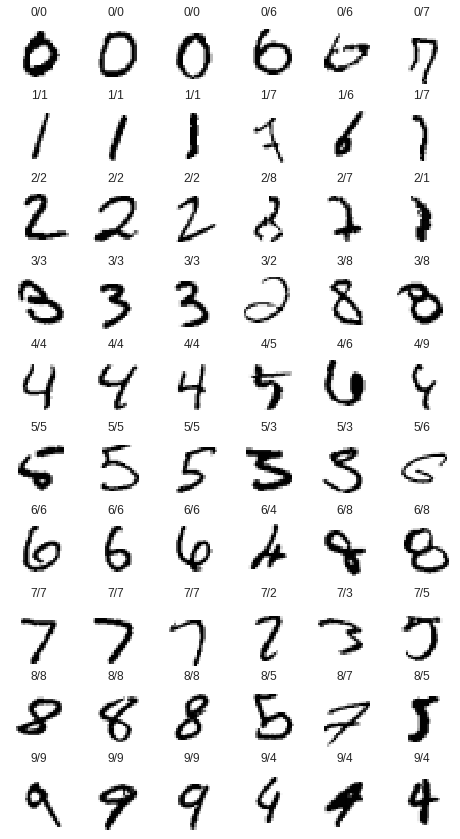

In [7]:
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x:images, t:labels})
#맞는 것과 틀린 것 세개씩 출력
fig = plt.figure(figsize = (8,15))
for i in range(10):
  c = 1
  for(image, label, pred) in zip(images, labels, p_val):
    prediction, actual = np.argmax(pred), np.argmax(label)#actual : 실제값
    if prediction != i:
      continue
    if (c < 4 and i == actual) or (c >= 4 and i!= actual):
      subplot = fig.add_subplot(10, 6, i*6 +c)
      subplot.set_xticks([])
      subplot.set_yticks([])
      subplot.set_title('%d/%d'%(prediction, actual))
      subplot.imshow(image.reshape((28,28)), vmin = 0, vmax = 1, cmap = plt.cm.gray_r, interpolation = "nearest")
      c += 1
      if c>6:
        break